In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 70 kB 264 kB/s            


In [3]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc


In [4]:
pd.options.display.max_columns=50

In [5]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [6]:
df = web.DataReader("TSLA", 'yahoo', start, end)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [8]:
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)


print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-01-02  44.650002  42.652000  44.574001  43.862000  23822000.0  43.862000
2015-01-05  43.299999  41.431999  42.910000  42.018002  26842500.0  42.018002
2015-01-06  42.840000  40.841999  42.012001  42.256001  31309500.0  42.256001
2015-01-07  42.956001  41.956001  42.669998  42.189999  14842000.0  42.189999
2015-01-08  42.759998  42.001999  42.562000  42.124001  17212500.0  42.124001


In [9]:
df.to_csv('TSLA.csv')

In [10]:
df = pd.read_csv('./TSLA.csv', parse_dates=True, index_col=0)

<Figure size 1440x720 with 0 Axes>

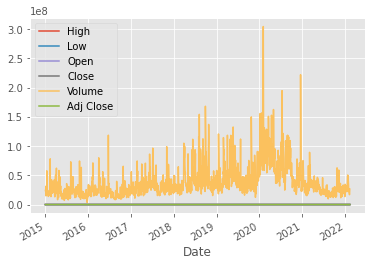

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df.plot()
plt.show()

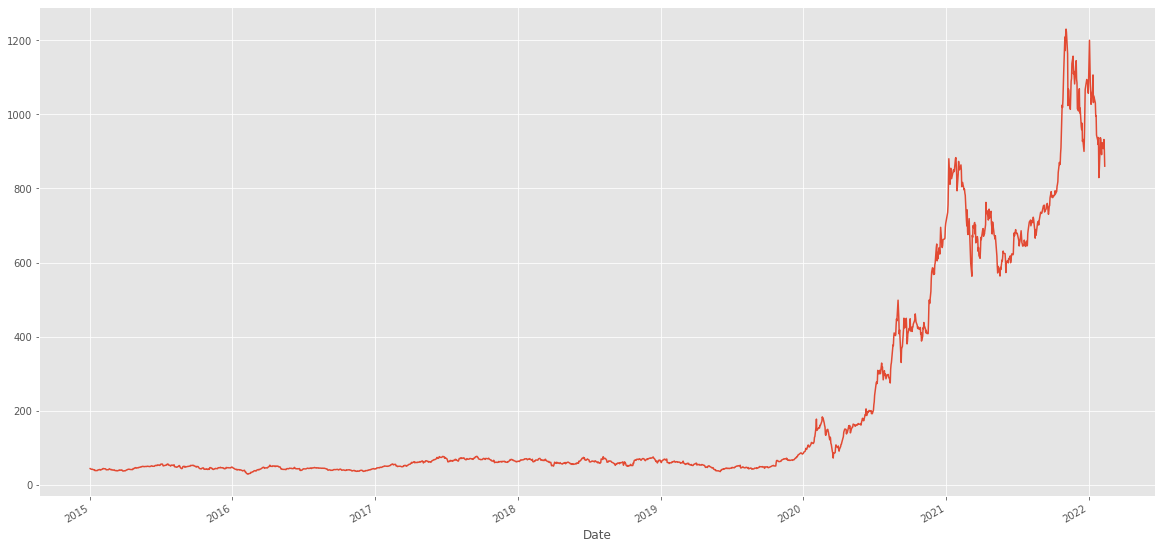

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
df['Adj Close'].plot()
plt.show()

In [13]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

In [14]:
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2015-01-02  44.650002  42.652000  44.574001  43.862000  23822000.0  43.862000   
2015-01-05  43.299999  41.431999  42.910000  42.018002  26842500.0  42.018002   
2015-01-06  42.840000  40.841999  42.012001  42.256001  31309500.0  42.256001   
2015-01-07  42.956001  41.956001  42.669998  42.189999  14842000.0  42.189999   
2015-01-08  42.759998  42.001999  42.562000  42.124001  17212500.0  42.124001   

            100ma  
Date               
2015-01-02    NaN  
2015-01-05    NaN  
2015-01-06    NaN  
2015-01-07    NaN  
2015-01-08    NaN  


In [15]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2015-01-02  44.650002  42.652000  44.574001  43.862000  23822000.0  43.862000   
2015-01-05  43.299999  41.431999  42.910000  42.018002  26842500.0  42.018002   
2015-01-06  42.840000  40.841999  42.012001  42.256001  31309500.0  42.256001   
2015-01-07  42.956001  41.956001  42.669998  42.189999  14842000.0  42.189999   
2015-01-08  42.759998  42.001999  42.562000  42.124001  17212500.0  42.124001   

                100ma  
Date                   
2015-01-02  43.862000  
2015-01-05  42.940001  
2015-01-06  42.712001  
2015-01-07  42.581500  
2015-01-08  42.490000  


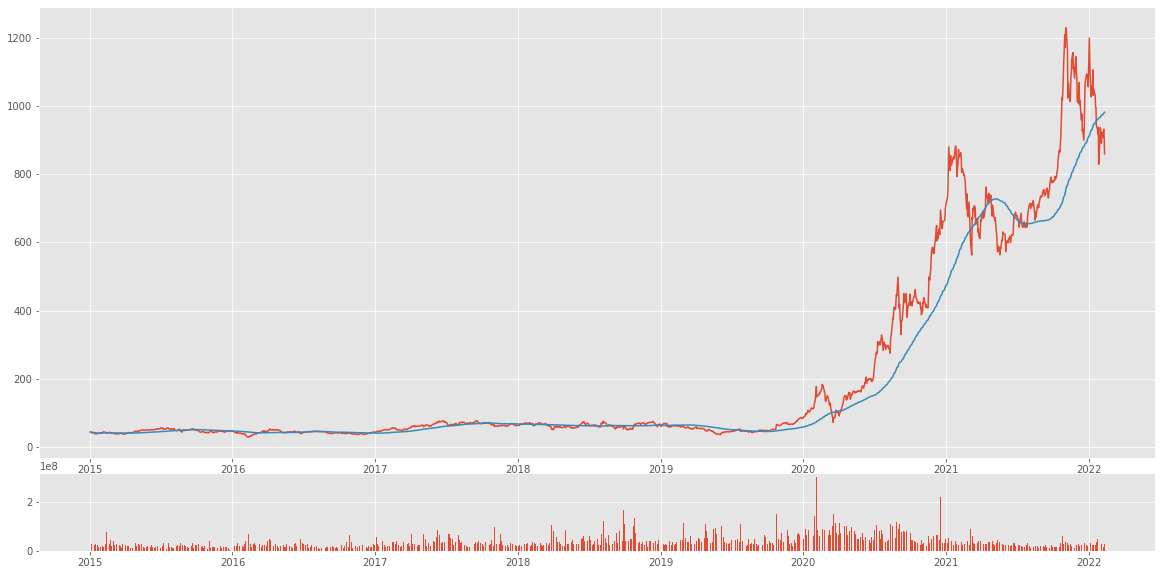

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [17]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [18]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

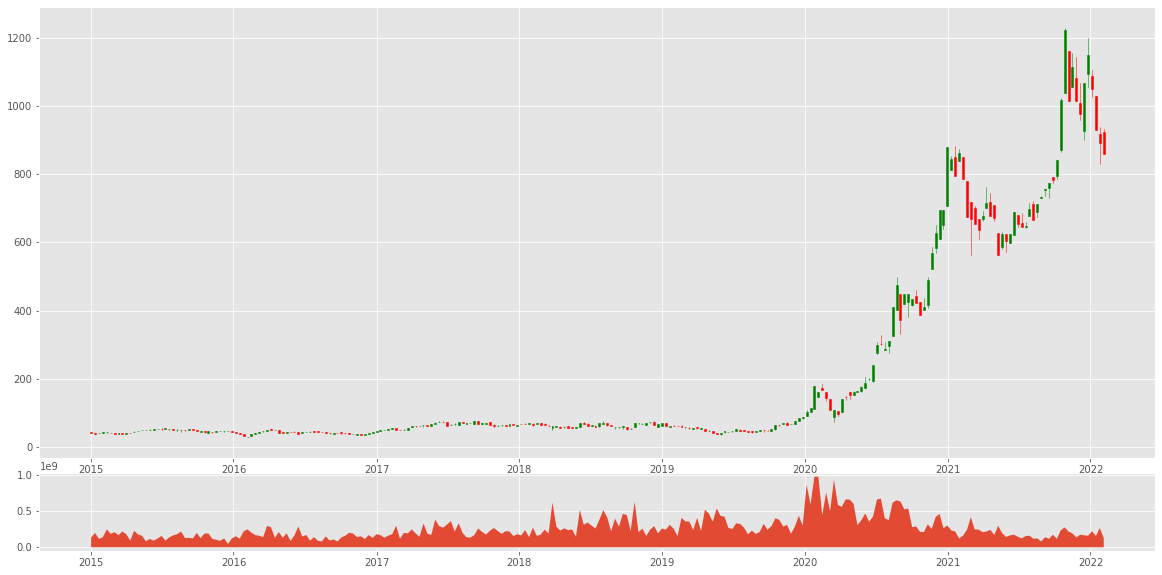

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()